#### Importing required libraries

In [51]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    I have used iris dataset(only the first 100 records).
    The classification is based on two input features:
        1.Sepal Length
        2.Sepal Width

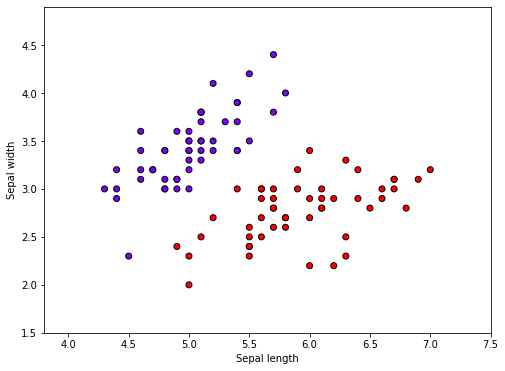

In [52]:
iris = datasets.load_iris()
n = 100
X=iris.data[0:n,:2]
Y=iris.target[0:n]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='rainbow' ,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.show()

#### Implemeting Batch Gradient Descent

In [53]:
# Function for batch gradient decent  
def Batch_GD (Learning_Rate, Precision ,X,Y):
    #Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    flag=b=i=0
    costs=[]
    temp = 0
    
    # Starting Loop
    while(True):
        #Step 2: Apply Sigmoid Function and get y prediction
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        #Step 3: Calculate Loss Function
        loss=-(1/N)*np.sum(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred))
        if flag==0:
            temp = loss+1
            flag = 1
        #Step 4: Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-Y).T)
        db=1/N*np.sum(y_pred-Y)
        
        #Step 5: Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(loss)
        i += 1
        if temp - loss < Precision:
            break
        temp = loss
       
    print(w)
    print(b)
    return w,b,costs
# Run a function
w,b,costs=Batch_GD(Learning_Rate=0.03,Precision=0.0000001,X=X,Y=Y)

[[  8.06471967]
 [-10.92947858]]
-9.86807173113446


    After many iterations, we have minimised the loss function to achive a precision of 10^-7. The graph below shows how the loss function decreased with everth 1000th iteration.

<function matplotlib.pyplot.show(close=None, block=None)>

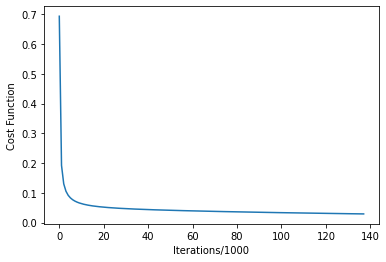

In [54]:
itr = list(range(0,len(costs)))
plt.plot(itr,costs)
plt.xlabel('Iterations/1000')
plt.ylabel('Cost Function')
plt.show

#### After we have calculated the value of w and b, a line can be fitted that will divide the given dataset.

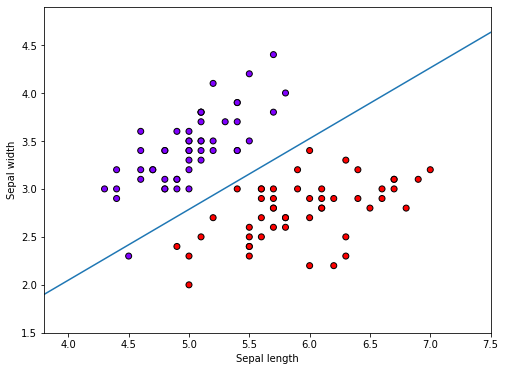

In [55]:
x = np.linspace(x_min,x_max,100)
y = (-w[0]*x-b)/w[1]
# Plot linear classification
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap= 'rainbow',edgecolor='k')
plt.plot(x, y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.show()